In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class polynomial:
    
    def __init__(self, coef):
        self.coef = coef
        self.degree = len(coef)-1
        
    def show(self):
        text = f"P(x)={self.coef[0]}"
        for i in range(1, self.degree+1):
            text = text + f"+{self.coef[i]}*x^{i}"
        print(text)
        
    def eval(self, x):
        return sum(self.coef[i]*x**i for i in range(self.degree+1))
    
    def plot(self, xlim, n = 1000, points = None):
        x = np.linspace(xlim[0], xlim[1], n)
        plt.plot(x, self.eval(x))
        if points:
            plt.scatter(points[0], points[1], c = "red")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

In [3]:
def interpolation(x, y):
    n = len(x)
    coef = np.empty(n)
    A = np.array([[x[j]**i for i in range(n)] for j in range(n)])
    print(A.shape)
    coef = np.linalg.solve(A, y)
    return polynomial(coef)

(4, 4)
P(x)=2.0+-3.166666666666666*x^1+2.4999999999999996*x^2+-0.33333333333333326*x^3


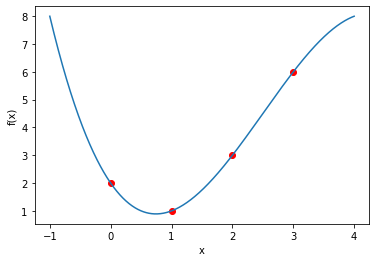

In [4]:
x = np.array([0, 1, 2, 3])
y = np.array([2, 1, 3, 6])
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 4], points = points)

(11, 11)
P(x)=1.0000000000000053+-4.443335855776198e-14*x^1+-16.855203619909986*x^2+1.1009711660866135e-12*x^3+123.35972850679272*x^4+-6.960922138522803e-12*x^5+-381.4338235294363*x^6+1.2793585635328905e-11*x^7+494.9095022624834*x^8+-6.889201304334954e-12*x^9+-220.94174208146825*x^10


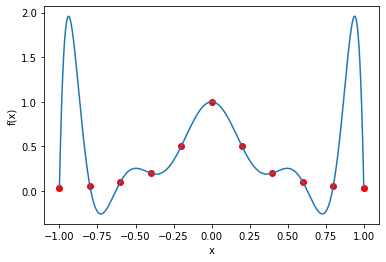

In [5]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)

[-9.89821442e-01 -9.09631995e-01 -7.55749574e-01 -5.40640817e-01
 -2.81732557e-01  6.12323400e-17  2.81732557e-01  5.40640817e-01
  7.55749574e-01  9.09631995e-01  9.89821442e-01]
(11, 11)
P(x)=1.0000000000000049+8.543506666330865e-15*x^1+-12.476511524283207*x^2+-5.305187297600974e-13*x^3+61.44301859274378*x^4+1.8978395466605407e-12*x^5+-133.44475553833115*x^6+-2.2404016856274786e-12*x^7+130.1058386748468*x^8+8.644324622075815e-13*x^9+-46.63291708775848*x^10


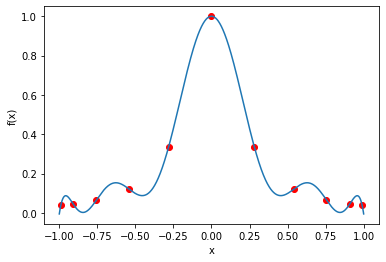

In [6]:
n = 11
x = np.array(np.sort([np.cos((2*i+1)/(2*n)*np.pi) for i in range(n)]))
print(x)
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)
plt.show()

In [69]:
def splain_interpolation(x, y, verbose = False):
    n = len(x)
    coef = np.empty(n)
    A = np.zeros((4*n-4, 4*n-4))
    b = np.empty(4*n-4)
    A[0, 0:4] = np.array([j*x[0]**(j-1) for j in range(4)])
    A[1, 4*n-8:4*n-4] = np.array([j*x[n-1]**(j-1) for j in range(4)])
    b[0] = 0
    b[1] = 0
    for i in range(n-1):
        A[i+2, 4*i:4*i+4] = np.array([x[i]**j for j in range(4)])
        A[i+n+1, 4*i:4*i+4] = np.array([x[i+1]**j for j in range(4)])
        A[i+2*n+1, 4*i:4*i+4] = np.array([x[i]**j for j in range(4)])
    
    if verbose:
        print(f"A={A}")
    #coef = np.linalg.solve(A, y)
    return polynomial(coef)

3

In [70]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
result = splain_interpolation(x, y, verbose = True)

ValueError: could not broadcast input array from shape (4,) into shape (40,)

p_i(x_i)=y_i
p_i(x_{i+1})=y_{i+1}
p_i'(x_i)=0
p_i'(x_{i+1})=p_{i+1}'(x_{i+1})
p_i"(x_{i+1})=p_{i+1}"(x_{i+1})